In [1]:
import scipy.misc
import pyfits
import numpy as np
import scipy.constants as constants
import matplotlib.pyplot as plt
import os
import sys,re

In [2]:
#funcion que obtiene el circulo que pasa entre los 3 puntos
def ob_circulo(x,y,z):
    #x, y, z = 0+1j, 1+0j, 0-1j
    w = z-x
    w /= y-x
    c = (x-y)*(w-abs(w)**2)/2j/w.imag-x
    print '(x%+.3f)^2+(y%+.3f)^2 = %.3f^2' % (c.real, c.imag, abs(c+x))
    return (round(c.real,3), round(c.imag,3), round(abs(c+x),3))
#print ob_circulo(1+1j,2,3)

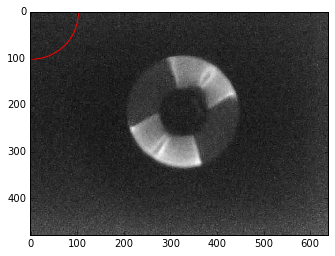

In [3]:
#prueba N 1
%matplotlib inline
imagen_1 = scipy.misc.imread('imagen_1.jpg',flatten=True)
#print imagen_0_2
fig, ax = plt.subplots()
circle = plt.Circle((2.5,1.5), 100,fill=False,color='r')
ax.add_artist(circle)
plt.imshow(imagen_1, cmap='gray')
plt.show()

In [4]:
%matplotlib inline
def ob_radio(imagen,x,y,z):
    #obtengo los datos del circulo:
    x_2 = x[0]+(x[1])*1j
    y_2 = y[0]+(y[1])*1j
    z_2 = z[0]+(z[1])*1j
    circulo = ob_circulo(x_2,y_2,z_2)
    
    #ploteo la imagen,sus 3 puntos y su circulo:
    imagen_1 = scipy.misc.imread(imagen,flatten=True)
    fig, ax = plt.subplots()
    plt.plot(x[0],x[1], marker='x', markersize=7)
    plt.plot(y[0],y[1], marker='x', markersize=7)
    plt.plot(z[0],z[1], marker='x', markersize=7)
    plot_circulo = plt.Circle((-circulo[0],-circulo[1]), circulo[2],fill=False,color='yellow')
    ax.add_artist(plot_circulo)
    plt.imshow(imagen_1, cmap='gray')

    #guardado de la imagen
    nombre = str(imagen)
    nombre = nombre[:-3]+'pdf'
    #plt.savefig(nombre)
    
    
    #retorno el radio:
    return circulo[2]
def ob_cuociente(I,R):
    b =1.26*520*I/(10**6)
    print str(b)+' campo magnetico'
    print str(R*100)+'*10^-2 radio de curvatura'
    B =b**2
    A = R**2
    #return str(round(200/B*A,4)/(10*11))+'*10^11'
    return str(round(200/B*A,20))

0.00985294117647
centimetros-->pixeles


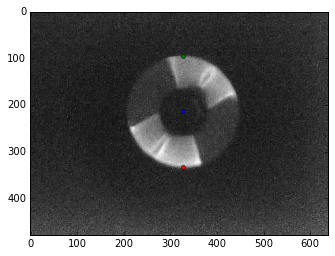

In [5]:
#obtencion de escala pixeles --> centimetros
imagen_1 = scipy.misc.imread('imagen_1.jpg',flatten=True)
fig, ax = plt.subplots()
plt.plot(328,213,marker='o',markersize=4)
plt.plot(328,94,marker='o',markersize=4)
plt.plot(328,332,marker='o',markersize=4)
plt.imshow(imagen_1, cmap='gray')
diametro_pixeles = 2*(213-94)
#print diametro_pixeles
print 2.345/238
print 'centimetros-->pixeles'
#con esto armamos la escala
def pixeles_a_metros(pixeles):
    pixeles_diametro = 238
    cm_diametro = 2.345
    metros_diametro = 2.345/100
    return (metros_diametro*pixeles)/pixeles_diametro
def pixeles_a_cm(pixeles):
    pixeles_diametro = 238
    cm_diametro = 2.045
    return (cm_diametro*pixeles)/pixeles_diametro

(x-82.342)^2+(y-196.368)^2 = 232.370^2
radio de curvatura: 0.0228952794118 metros


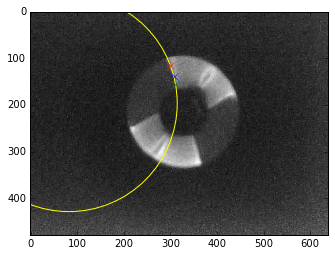

In [6]:
radio_1 = ob_radio('imagen_1.jpg',(307,137),(311,155),(300,115)) #verde, azul, rojo
print 'radio de curvatura: '+str(pixeles_a_metros(radio_1))+' metros'
#print ob_cuociente(0.47,pixeles_a_metros(radio_1))

(x-759.444)^2+(y-67.333)^2 = 449.871^2
radio de curvatura: 0.044325525 metros


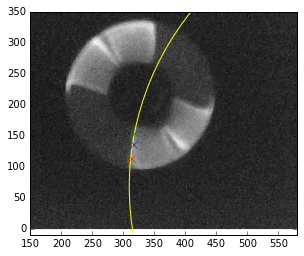

In [44]:
radio_2 = ob_radio('imagen_2.jpg',(315,137),(318,154),(312,114)) #azul, verde, rojo
plt.xlim(150,580)
plt.ylim(-10,350)
plt.savefig('imagen_2.pdf')
print 'radio de curvatura: '+str(pixeles_a_metros(radio_2))+' metros'
#ob_cuociente(1.00,pixeles_a_metros(radio_2))

(x-720.500)^2+(y-145.500)^2 = 399.590^2
radio de curvatura: 0.0393713676471 metros


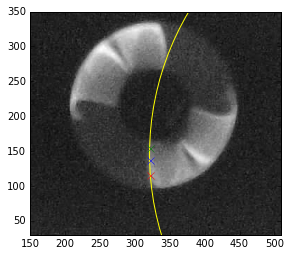

In [42]:
radio_3 = ob_radio('imagen_3.jpg',(321,137),(321,154),(322,116)) #azul, verde, rojo
plt.xlim(150,510)
plt.ylim(30,350)
plt.savefig('imagen_3.pdf')
print 'radio de curvatura: '+str(pixeles_a_metros(radio_3))+' metros'
#ob_cuociente(1.00,pixeles_a_metros(radio_3))

(x-503.394)^2+(y-171.351)^2 = 180.434^2
radio de curvatura: 0.0177780558824 metros


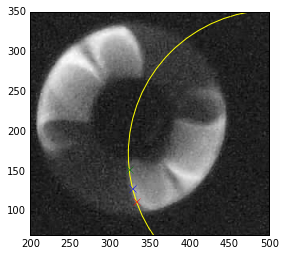

In [78]:
radio_4 = ob_radio('imagen_4.jpg',(328,129),(324,152),(333,112)) #azul, verde, rojo
plt.xlim(200,500)
plt.ylim(70,350)
plt.savefig('imagen_4.pdf')
print 'radio de curvatura: '+str(pixeles_a_metros(radio_4))+' metros'
#ob_cuociente(1.00,pixeles_a_metros(radio_4))

(x-249.227)^2+(y-252.227)^2 = 94.046^2
radio de curvatura: 0.00926629705882 metros


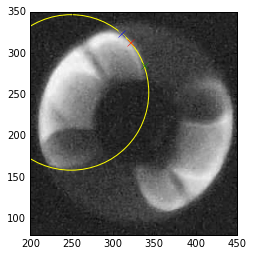

In [106]:
radio_5 = ob_radio('imagen_5.jpg',(310,324),(337,286),(321,313)) #azul, verde, rojo
plt.xlim(200,450)
plt.ylim(80,350)
plt.savefig('imagen_5.pdf')
print 'radio de curvatura: '+str(pixeles_a_metros(radio_5))+' metros'
#ob_cuociente(1.00,pixeles_a_metros(radio_5))


(x-393.505)^2+(y-181.819)^2 = 68.936^2
radio de curvatura: 0.00679222352941 metros


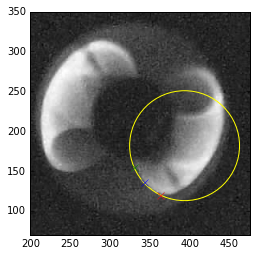

In [123]:
radio_6 = ob_radio('imagen_6.jpg',(342,136),(330,155),(363,120)) #azul, verde, rojo
plt.xlim(200,475)
plt.ylim(70,350)
plt.savefig('imagen_6.pdf')
print 'radio de curvatura: '+str(pixeles_a_metros(radio_6))+' metros'
#ob_cuociente(1.00,pixeles_a_metros(radio_6))
